## Load data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
# df.head()

## Clean up data

In [3]:
# we need to predict MSRP - retail price - based on other features
# but before we need to look at data, prepare and beautify it...

# STEP 1 - make columns look good:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
# df.head()

In [4]:
# STEP 2 - use dtypes and make all df values look unified

df.dtypes # for example number_of_doors is float64 )) -- not a good idea )) 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings # all string cols here - we can modify and clean it

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA - exploratory data analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

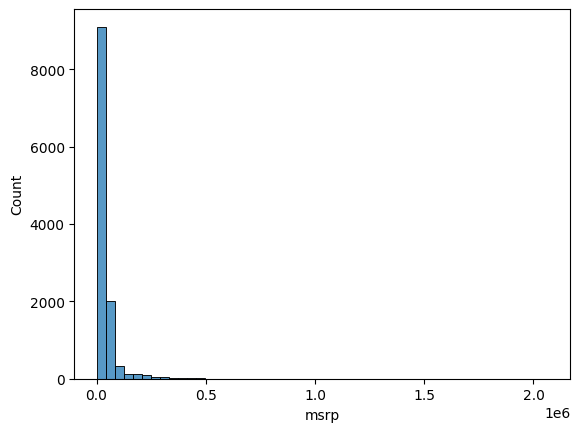

In [9]:
sns.histplot(df.msrp, bins=50) # we got a very long tail distribution - majority of cars are cheap but few cost 1 or 2 millions...

<Axes: xlabel='msrp', ylabel='Count'>

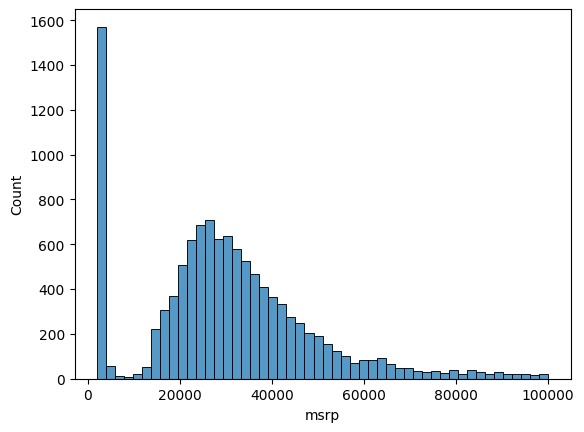

In [10]:
# how to cut this long tail:

sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [11]:
# converting to log scale so our models cannot be confused by huge numbers
# essentially we add 1 to every price like so to avoid crash on zero values:
np.log([0+1, 1+1, 10+1, 100+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [12]:
# this is log - we put number e=2.7.... to the power to get the result
# log 1 is zero - see the first result
# here is a smarter way of how not to add 1 manually all the time - use log1p instead:

np.log1p([0, 1, 10, 100, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [13]:
price_logs = np.log1p(df.msrp)
price_logs.head()

0    10.739349
1    10.612779
2    10.500977
3    10.290483
4    10.448744
Name: msrp, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

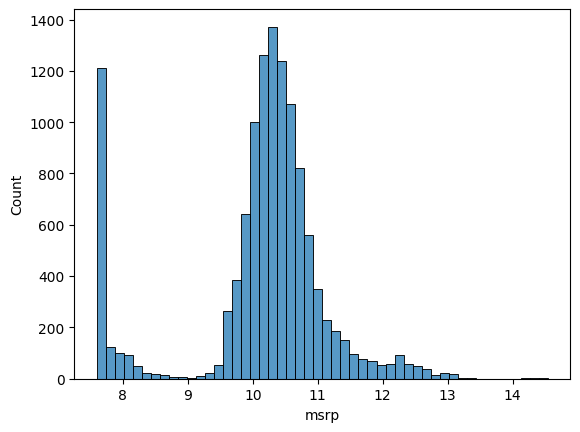

In [14]:
sns.histplot(price_logs, bins=50)

In [15]:
# handling missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [16]:
# we need to split our df - 60% for training part, 20% for validation, 20% for test dataset
n = int(len(df))
n_val = int(n * 0.2)
n_test = n_val
n_train = n - 2*n_val
n, n_val + n_test + n_train # (11914, 11914) - our ariphmetics works!

(11914, 11914)

In [17]:
# our original df is sorted - bmw goes first, etc... 
# so we need to shuffle df rows before breaking into test, val and train datasets

idx = np.arange(n) # this is our index

np.random.seed(2) # to make our results reproducible in the future
np.random.shuffle(idx)
idx[10:] # it is shuffled now like so
# array([7557, 4060, 3773, ..., 6637, 2575, 7336], shape=(11904,))

array([7557, 4060, 3773, ..., 6637, 2575, 7336], shape=(11904,))

In [18]:
# so our split will be
n_val, n_test, n_train # (2382, 2382, 7150)

(2382, 2382, 7150)

In [19]:
# a trick - we do not take rows directly but use our reshuffled index instead:
df_val = df.iloc[idx[:n_val]] # iloc takes actual rows, not index
len(df_val)

2382

In [20]:
df_test = df.iloc[idx[n_val:n_val + n_test]]
len(df_test)

2382

In [21]:
df_train = df.iloc[idx[n_val + n_test:]]
len(df_train)

7150

In [22]:
df_train.head() # note - index is reshuffled ))

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585


In [23]:
# we can reset index for every new dataset to make it look nice
df_train = df_train.reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585


In [24]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
# to train the model we need to log MSRP
y_train = np.log1p(df_train.msrp.values)
y_train # array([ 9.70479268, 10.09187401,

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162], shape=(7150,))

In [26]:
y_test = np.log1p(df_test.msrp.values)
y_test

array([ 9.85224689,  9.58190393, 11.62626308, ...,  7.79317435,
       10.29876764, 10.29404205], shape=(2382,))

In [27]:
y_val = np.log1p(df_val.msrp.values)
y_val

array([ 9.57574708,  9.887663  ,  9.89323518, ...,  9.97399261,
       10.92595647, 10.13701698], shape=(2382,))

In [28]:
# finally we can delete MSRP varuable, so our model will not accidentally look at it
del df_train["msrp"]

In [29]:
del df_test["msrp"]
del df_val["msrp"]
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


## Linear regression

In [30]:
# we can implement it manually as a function - 
# in case we have 3 features - engine_hp	city_mpg	and popularity
# we would need w0 - bias and weights vector

w0 = 0
w = [1, 1, 1]
xi = [453, 11, 86] # we took it randomly from df_val.iloc[10]
df_val.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [31]:
def linear_regression(xi):
    n = len(xi) # length of our feature vector
    
    pred = w0 # we start our prediction with adding bias
    
    for j in range(n):
        pred += w[j]*xi[j]

    return pred
    

In [32]:
# lets predict with our weights and bias ))
linear_regression(xi)

550

In [33]:
# if we know weights and biases than answer is better:
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi) # 12.312 - should be in our logariphmic scale...

12.312

In [34]:
# real price - take exponent

int(np.expm1(12.312)) # 222347 USD predicted
# we use exponent minus 1 - np.expm1 function as before we did the log plus 1

222347

In [35]:
# real price is 479775 - ai ai ai ))

df[df.model == 'phantom_drophead_coupe']

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7556,rolls-royce,phantom_drophead_coupe,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,474600
7557,rolls-royce,phantom_drophead_coupe,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,479775
7558,rolls-royce,phantom_drophead_coupe,2016,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86,492000


## Linear regression in vector form

In [36]:
# we start with dot product function as we did before:

def dot(xi, w):
    res = 0.0
    
    n = len(xi) # length of our feature vector
    
    for j in range(n):
        res += w[j]*xi[j]

    return res


In [37]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [38]:
# test it:
linear_regression(xi) # still 12.312 ...

12.312000000000001

In [39]:
# how to bring bias w0 to other vectors/weights - just add new feature which is always 1:

w_new = [w0] + w # or use list extend method...
w_new # [7.17, 0.01, 0.04, 0.002]

[7.17, 0.01, 0.04, 0.002]

In [40]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [41]:
# test it:
linear_regression(xi) # still 12.312 ...

12.312

In [42]:
# matrix - vector multiplication for many cars prediction:
x1  = [1, 124, 46, 3998 ]
x2  = [1, 134, 41, 4998 ]
x10 = [1, 453, 11, 86  ]

X = [x1, x2, x10] # list of lists
X = np.array(X)
X

array([[   1,  124,   46, 3998],
       [   1,  134,   41, 4998],
       [   1,  453,   11,   86]])

In [43]:
# and our regression function will be 
def linear_regression(X):
    return X.dot(w_new)

In [44]:
linear_regression(X) # array([18.246, 20.146, 12.312]) - we predicted car prices for 3 cars

array([18.246, 20.146, 12.312])

## Training a linear regression model

In [45]:
def train_linear_regression(X):
    pass

In [46]:
X = [
    [124, 46, 3998 ],
    [134, 41, 4998 ],
    [453, 11, 86  ],
    [224, 46, 3998 ],
    [234, 41, 4998 ],
    [253, 11, 86  ],
    [324, 46, 3998 ],
    [334, 41, 4998 ],
    [453, 11, 86  ]
]

X = np.array(X)
X # prepare fake data

array([[ 124,   46, 3998],
       [ 134,   41, 4998],
       [ 453,   11,   86],
       [ 224,   46, 3998],
       [ 234,   41, 4998],
       [ 253,   11,   86],
       [ 324,   46, 3998],
       [ 334,   41, 4998],
       [ 453,   11,   86]])

In [47]:
# Lets include the bias term - how much car should cost if we know nothing about it - 
# e.g. all weights are zero

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.240e+02, 4.600e+01, 3.998e+03],
       [1.000e+00, 1.340e+02, 4.100e+01, 4.998e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 2.240e+02, 4.600e+01, 3.998e+03],
       [1.000e+00, 2.340e+02, 4.100e+01, 4.998e+03],
       [1.000e+00, 2.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.240e+02, 4.600e+01, 3.998e+03],
       [1.000e+00, 3.340e+02, 4.100e+01, 4.998e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01]])

In [49]:
XTX = X.T.dot(X) # Gram matrix
XTX

array([[9.00000000e+00, 2.53300000e+03, 2.94000000e+02, 2.72460000e+04],
       [2.53300000e+03, 8.29223000e+05, 7.24430000e+04, 6.29492600e+06],
       [2.94000000e+02, 7.24430000e+04, 1.17540000e+04, 1.16931600e+06],
       [2.72460000e+04, 6.29492600e+06, 1.16931600e+06, 1.22914212e+08]])

In [50]:
XTX_inv = np.linalg.inv(XTX) # inverse Gram matrix

In [51]:
# An identity matrix, denoted by I or I\_n, is a square matrix with ones on its main diagonal and zeros everywhere else.
# It is the multiplicative identity for matrices, meaning that any matrix multiplied by the identity matrix 
# of the same dimension remains unchanged

XTX.dot(XTX_inv).round(1) # quick check if we get an identity matrix with 1s in diagonal
# this is correct - 1s in diagonal - so we truly found the inverse matrix for XTX...

array([[ 1., -0., -0.,  0.],
       [-0.,  1., -0.,  0.],
       [-0., -0.,  1.,  0.],
       [-0., -0., -0.,  1.]])

In [52]:
# lets create fake prices y
y = [100, 200, 150, 250, 100, 200, 150, 250, 10 ]

In [53]:
# lets calculate weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full # array([ 1.60940188e+02, -9.00000000e-02, -6.71996579e-01,  1.42066838e-02])

array([ 1.60940188e+02, -9.00000000e-02, -6.71996579e-01,  1.42066838e-02])

In [54]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(160.9401875610984), array([-0.09      , -0.67199658,  0.01420668]))

In [55]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) # Gram matrix
    XTX_inv = np.linalg.inv(XTX) # inverse Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [56]:
X = [
    [124, 46, 3998 ],
    [134, 41, 4998 ],
    [453, 11, 86  ],
    [224, 46, 3998 ],
    [234, 41, 4998 ],
    [253, 11, 86  ],
    [324, 46, 3998 ],
    [334, 41, 4998 ],
    [453, 11, 86  ]
]

X = np.array(X)
X # prepare fake data


train_linear_regression(X, y) # same as before....

(np.float64(160.9401875610984), array([-0.09      , -0.67199658,  0.01420668]))

## Car price baseline model

In [57]:
# video https://www.youtube.com/watch?v=SvPpMMYtYbU&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=20

# starting with numerical columns - to train our model v0
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [58]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values
# X
y_train # we have it already - our rmse - prices

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162], shape=(7150,))

In [59]:
# if we run train_linear_regression(X, y) now we will got nan because of missing values

train_linear_regression(X_train, y_train)
# (np.float64(nan), array([nan, nan, nan, nan, nan]))

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [60]:
df_train[base].isnull().sum()
# missing values in engine_hp   43
# and engine_cylinders    20

engine_hp           43
engine_cylinders    20
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [61]:
# df_train[base].fillna(0) #.isnull().sum() # we fill missing values with zeroes and model will ignore these features inside instances / observations
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [62]:
w0, w # we got bias w0 and weights w:
# (np.float64(7.963556475096456),
#  array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02,  1.22881992e-02,
#         -1.11571602e-05]))

(np.float64(7.963556475096456),
 array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02,  1.22881992e-02,
        -1.11571602e-05]))

In [63]:
# lets do some predictions with our weights

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

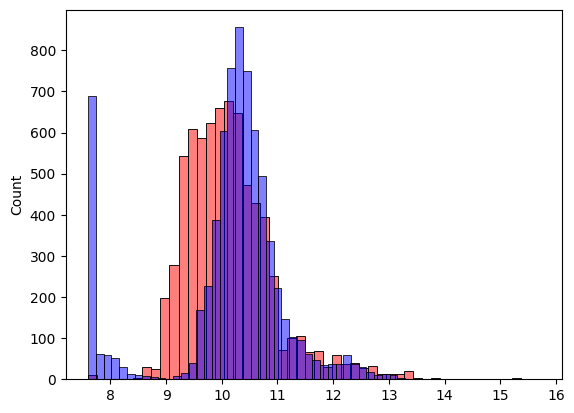

In [64]:
# we can plot predicted price against our actual price - RMSE
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE

In [65]:
# as we can see our model is a bit off - because original distribution has 2 hills 
# but our predicted linear model is bell-shaped curve... RMSE is a formal way to measure the prediction error

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean() # here we use numpy for vectors, so mean method is built-in
    rmse = np.sqrt(mse)
    return rmse

In [66]:
rmse(y_pred, y_train)

np.float64(0.745130516822012)

## Validating the model

In [67]:
# because we built a baseline model with 5 numerical features we can valudate it now on val dataset with our rmse function

# lets do some predictions with our weights first

X_val = df_val[base].fillna(0).values
y_pred_val = w0 + X_val.dot(w)
y_pred_val

array([ 9.58361063,  9.42525104,  9.70558187, ...,  9.99554516,
       10.6031682 ,  9.56418114], shape=(2382,))

In [68]:
rmse(y_val, y_pred_val) # np.float64(0.7419381478118967)

np.float64(0.7419381478118967)

In [69]:
# or we can also do it like in video:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    # we will use this function to prepare any dataset, not only for training or testing
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [70]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # same as before - np.float64(0.7419381478118967)

np.float64(0.7419381478118967)

## Simple feature engineering

In [71]:
# we used only 5 numrical features earler, but we missed age of the car - could be important parameter...

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # called base because we DO NOT modify these features...

def prepare_X(df):
    # we will use this function to prepare any dataset, not only for training or testing
    # adding new calculated feature - age of the car:
    df = df.copy() # if not using copy then new column age will appear in our dataframe...
    df['age'] = 2017 - df.year # we assumed that today is year of 2017 here - and age of the car built in 2017 is 0
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [72]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # before - np.float64(0.7419381478118967)
# after age is added RMSE is better (error is smaller) - np.float64(0.5222394405268987)

np.float64(0.5222394405268987)

<Axes: ylabel='Count'>

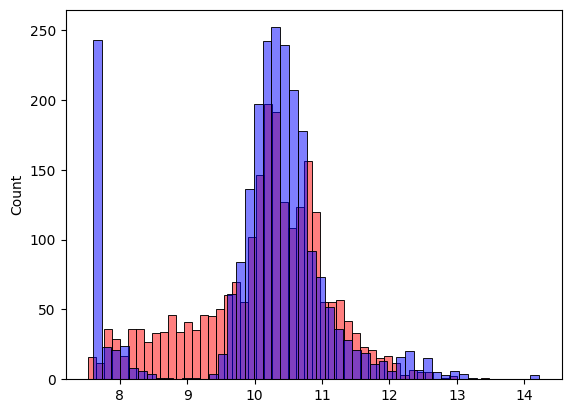

In [73]:
# df_train.dtypes # now it is good
# technically we added new column to our dataframe: age int64 before
# del df_train['age'] # and we can remove it like so

# lets plot our new predictions vs ground truth:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [74]:
# our picture now looks a bit better...

## Categorical variables

In [75]:
(df_train.number_of_doors == 4).astype(int) 
# we use this trick to create 1-0 columns for categorical variables — method called One Hot Encoding

0       1
1       1
2       0
3       0
4       1
       ..
7145    0
7146    1
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [76]:
# another Python trick - string replacement
"num_doors%s" %4 # 'num_doors4'

'num_doors4'

In [77]:
# we can modify our data prep function to add categorical one hot encoded features like so:

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # called base because we DO NOT modify these features...

def prepare_X(df):
    # we will use this function to prepare any dataset, not only for training or testing
    # adding new calculated feature - age of the car:
    df = df.copy() # if not using copy then new column age will appear in our dataframe...
    
    df['age'] = 2017 - df.year # we assumed that today is year of 2017 here - and age of the car built in 2017 is 0
    
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df["num_doors%s" % v] = (df_train.number_of_doors == v).astype('int')
        features.append("num_doors%s" % v)

    # print(df.head())
    # print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [78]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # np.float64(0.5260831203105211)

np.float64(0.5260831203105211)

<Axes: ylabel='Count'>

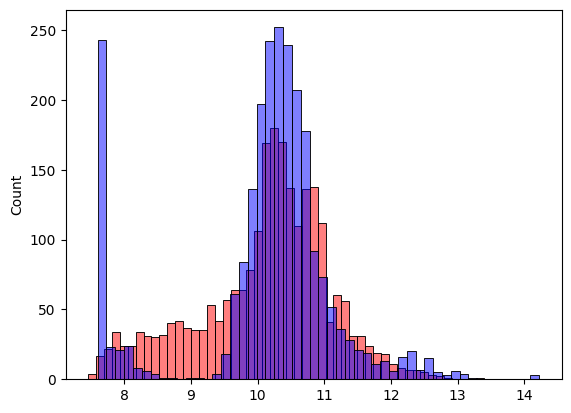

In [79]:
# after adding number of doors we got no improvement in RMSE np.float64(0.5260831203105211)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [80]:
# adding car make to our model
# video https://www.youtube.com/watch?v=sGLAToAAMa4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=24
# Homework deadline extended!
# We’re extending the deadline for Homework 2 until Wednesday, October 8.

df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [81]:
df.make.nunique() # 48 - lots of different cars...

48

In [82]:
# we can take only top car makes if needed:
makes = list(df.make.value_counts().head().index)
# ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [83]:
# we can modify our data prep function again to add categorical one hot encoded features ...

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # called base because we DO NOT modify these features...

def prepare_X(df):
    # we will use this function to prepare any dataset, not only for training or testing
    # adding new calculated feature - age of the car:
    df = df.copy() # if not using copy then new column age will appear in our dataframe...
    
    df['age'] = 2017 - df.year # we assumed that today is year of 2017 here - and age of the car built in 2017 is 0
    
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df["num_doors%s" % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors%s" % v)

    for v in makes:
        df["make_%s" % v] = (df.make == v).astype('int')
        features.append("make_%s" % v)


    # print(df.head())
    # print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [84]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # last time np.float64(0.5260831203105211)
# now np.float64(0.5100789886280986) - slightly better....

np.float64(0.5100789886280986)

<Axes: ylabel='Count'>

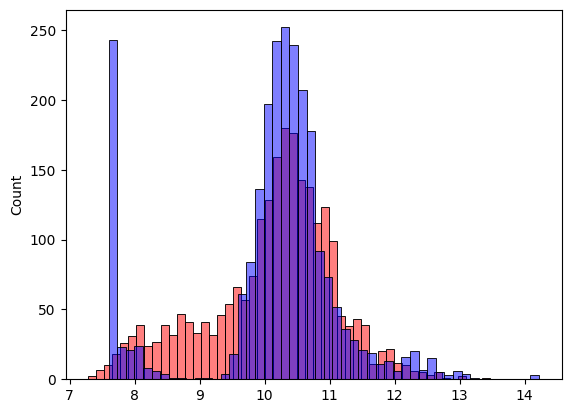

In [85]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [86]:
# but we do not stop here - other categorical variables still exist!!!
df_train.dtypes.index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [87]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [88]:
categorical = {}

for c in categorical_variables:
    categorical[c] = list(df[c].value_counts().head().index)

categorical # we get top 5 categorical variables values for each category

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [89]:

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # called base because we DO NOT modify these features...

def prepare_X(df):
    # we will use this function to prepare any dataset, not only for training or testing
    # adding new calculated feature - age of the car:
    df = df.copy() # if not using copy then new column age will appear in our dataframe...
    
    df['age'] = 2017 - df.year # we assumed that today is year of 2017 here - and age of the car built in 2017 is 0
    
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df["num_doors%s" % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors%s" % v)

    for name, values in categorical.items():
        for value in values:
            df["%s_%s" % (name, value)] = (df[name] == value).astype('int')
            features.append("%s_%s" % (name, value))

    # print(df.head())
    # print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X


    

In [90]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # last time 0.51
# now np.float64(814.3331542020205)

np.float64(814.3331542020205)

In [91]:
# strange result - RMSE is 1000 times higher...
int(w0) # 44122124360655472
# our bias became like 44 quadrillion.... if we know nothing about car it costs 44 quadrillion bucks!!

44122124360655472

In [92]:
w #  -3.54143312e+16, -3.54143312e+16, -3.54143312e+16, -3.54143312e+16,
# - weights become quadrillions too...

array([-2.10218200e+00,  1.28293708e+02, -4.75281371e+00, -1.41829383e+01,
       -1.37717941e-02, -5.61861454e+00, -1.92715863e+04, -1.94651436e+04,
       -1.92998060e+04,  3.98639352e+01,  9.38374443e+01, -1.30317009e+02,
        4.83282270e+01,  9.82435394e+01, -1.01346201e+03, -9.66521083e+02,
       -1.06911860e+03, -1.05956759e+03, -7.26859005e+02, -3.54143312e+16,
       -3.54143312e+16, -3.54143312e+16, -3.54143312e+16, -3.54143312e+16,
       -8.70779318e+15, -8.70779318e+15, -8.70779318e+15, -8.70779318e+15,
       -1.09439239e+01,  3.28013318e+00,  3.85881608e+00,  1.25998841e+00,
       -2.79678994e+01, -1.30293153e+02, -1.19167323e+02, -1.23114141e+02,
       -5.23253992e-02,  5.54593778e-02,  1.74932828e-01,  3.02782777e-01,
       -1.37794157e-01])

## Regularisation

In [93]:
# video https://www.youtube.com/watch?v=91ve3EJlHBc&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=25
# the problem above was humongous quadrillion weights - 
#  -3.54143312e+16, -3.54143312e+16, -3.54143312e+16, -3.54143312e+16
# and to avoid it we use regularisatio - adding small noise to matrix diagonal

# The trick is:
np.eye(3) 
# diagonal matrix with 1s - idempotent - if we multiply it to any other matrix it does not change
# this is similar to multiplying by 1 in scalar world

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [99]:
0.01 * np.eye(3) # our noise add matrix created - and it can become a hyperparameter too...

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.01]])

In [100]:
# modifying our train_linear_regression(X_train, y_train) function:

def train_linear_regression_reg(X, y, r=0.001):
    # this is regularised version or our training function, and we add r to diagonal matrix
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) # Gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0]) # we added a noise r to diagonal
    
    XTX_inv = np.linalg.inv(XTX) # inverse Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [101]:
# all our workflow in 1 cell - ML pipeline )):
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) # last time 0.51, then np.float64(814.3331542020205)
# now np.float64(0.4687156105576993) - a bit better than 0.51...

np.float64(0.4687156105576993)

<Axes: ylabel='Count'>

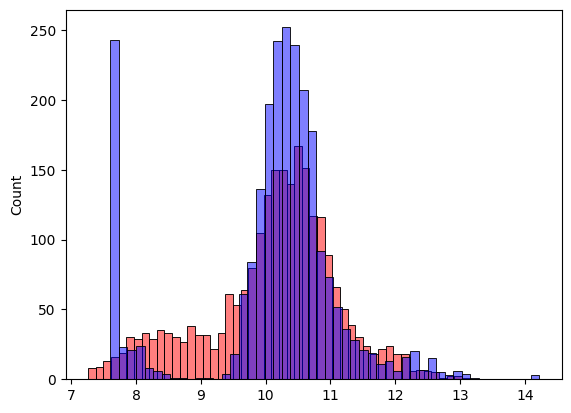

In [102]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## Tuning the model

In [107]:
# by tuning we normally understand trying to find best hyperparameters
# it could be done in a brute force cycle )) or perhaps smarter way ...

for r in [0, 0.00001, 0.0001, 0.001, 0.01, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print('r', r, 'rmse', score, 'bias', w0)

# r 0.001 rmse 0.4687168630757075 - prob the best we can get so far...

r 0 rmse 814.3331542020205 bias 4.412212436065547e+16
r 1e-05 rmse 0.46871706027685794 bias 13.990167201992714
r 0.0001 rmse 0.46871705030620037 bias 6.364476492966875
r 0.001 rmse 0.4687168630757075 bias 6.309187193962757
r 0.01 rmse 0.4687156105576993 bias 6.293131375184294
r 1 rmse 0.4701357829166667 bias 5.454208407964158
r 10 rmse 0.4817549149184747 bias 4.232200708816782


In [109]:
# so we select the best r = 0.001 and finally train the model like so:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

np.float64(0.4687168630757075)

In [110]:
w0, w # finally, our weights!!!

(np.float64(6.309187193962757),
 array([ 1.38869267e-03,  1.22980197e-01, -4.86520945e-03, -7.57614213e-03,
        -5.50779107e-05, -9.60826575e-02, -6.68841050e-01, -8.25693253e-01,
        -5.51226553e-01, -3.50281514e-02,  2.17855381e-01, -1.16524380e-02,
        -8.55023301e-02, -9.12635124e-02, -4.92265995e-01,  7.66999080e-02,
        -3.30448208e-01, -5.76971245e-01, -1.12796246e-01,  1.06211557e+00,
         8.51918181e-01,  1.12557334e+00,  2.73172171e+00,  5.38144574e-01,
         1.63004067e+00,  1.51122682e+00,  1.62552610e+00,  1.54000418e+00,
        -1.02608563e-01,  4.08642251e-02, -3.41480103e-02, -1.82837204e-02,
        -4.98036609e-02,  2.18470845e+00,  2.06292762e+00,  2.06117817e+00,
        -5.23299243e-02,  5.54623905e-02,  1.74934785e-01,  3.02787624e-01,
        -1.37810446e-01]))

## Using the model

In [ ]:
# before we trained the model on train dataset and evaluated in eval dataset - got RMSE
# finally we can use our last bullet - calc RMSE on our TEST dataset

